In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = os.path.join(os.getcwd(), 'data')
data_path

'/nfs/science/shared/ipythonNotebooks/leom/Kaggle/BB/data'

In [3]:
df_kpis = pd.read_excel(os.path.join(data_path, 'analisi.xlsx'), sheetname='KPIs')
df_spending = pd.read_excel(os.path.join(data_path, 'analisi.xlsx'), sheetname='Spending')

In [4]:
df_kpis.sort_values(by='Date', inplace=True)
# df_kpis.head(20)

In [5]:
df_kpis.shape

(932, 12)

In [6]:
df_kpis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 0 to 931
Data columns (total 12 columns):
Date    932 non-null datetime64[ns]
K1      932 non-null int64
K2      932 non-null int64
K3      932 non-null int64
K4      932 non-null int64
K5      932 non-null int64
K6      932 non-null int64
K7      932 non-null int64
K8      932 non-null int64
K9      932 non-null float64
K10     932 non-null float64
K11     932 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 94.7 KB


In [7]:
df_kpis.describe()

,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10,K11
count,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000
mean,11.957082,121.608369,1224.939914,1008.123391,2394.230687,2235.681330,401.503219,7398.043991,5.462774,0.374937,0.284551
std,92.494702,378.316995,516.493054,2823.077832,715.492618,1735.547803,382.924656,3998.842786,0.919098,0.115165,0.096236
min,0.000000,0.000000,155.000000,0.000000,194.000000,109.000000,83.000000,923.000000,3.030303,0.083159,0.035433
25%,0.000000,13.000000,826.750000,3.000000,1856.000000,1009.750000,235.000000,4504.000000,4.914800,0.291034,0.216624
50%,0.000000,27.000000,1234.000000,20.000000,2316.000000,1546.500000,330.000000,6224.000000,5.262321,0.404677,0.267932
75%,2.000000,56.000000,1482.500000,159.000000,2798.750000,3089.000000,448.000000,9447.500000,5.693961,0.454279,0.346154
max,2117.000000,4716.000000,3425.000000,20157.000000,5159.000000,8214.000000,6853.000000,25456.000000,9.331267,0.670593,0.678571


In [8]:
df_spending.sort_values(by='Date', inplace=True)
# df_spending.head()

In [9]:
df_spending.shape

(48, 4)

In [10]:
df_spending.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 2 to 20
Data columns (total 4 columns):
Date    48 non-null datetime64[ns]
E1      48 non-null int64
E2      48 non-null int64
E3      48 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.9 KB


In [11]:
df_spending.describe()

,E1,E2,E3
count,48.000000,48.000000,48.000000
mean,46641.375000,156225.062500,202866.437500
std,35972.240014,141070.034149,155455.458537
min,275.000000,0.000000,8490.000000
25%,16821.750000,20376.750000,63422.500000
50%,36485.500000,137202.500000,195134.000000
75%,69458.500000,264528.000000,315655.750000
max,169345.000000,683948.000000,711357.000000


In [12]:
df_kpis['month'] = df_kpis['Date'].dt.month
df_kpis['year'] = df_kpis['Date'].dt.year
df_kpis['weekday'] = df_kpis['Date'].dt.weekday
df_kpis['days_in_month'] = df_kpis['Date'].dt.daysinmonth

df_kpis_date = df_kpis['Date']

df_spending['month'] = df_spending['Date'].dt.month
df_spending['year'] = df_spending['Date'].dt.year
df_spending['days_in_month'] = df_spending['Date'].dt.daysinmonth
df_spending.index = df_spending['Date']
df_spending.drop('Date', axis=1, inplace=True)

df_spending['avgE1'] = df_spending['E1']/df_spending['days_in_month']
df_spending['avgE2'] = df_spending['E2']/df_spending['days_in_month']

df_kpis = df_kpis.merge(df_spending[['year', 'month', 'avgE1', 'avgE2']], on=['year', 'month'],
                        how='inner')
df_kpis.index = df_kpis_date

df_kpis.drop(['year', 'days_in_month'], axis=1, inplace=True)

In [13]:
df_kpis.head()

,Date,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10,K11,month,weekday,avgE1,avgE2
Date,,,,,,,,,,,,,,,,
2015-03-16,2015-03-16,0,0,155,0,194,379,195,923,3.030303,0.210184,0.333333,3,0,530.129032,4403.387097
2015-03-17,2015-03-17,1,8,1074,34,1320,658,468,3563,4.532667,0.370474,0.301205,3,1,530.129032,4403.387097
2015-03-18,2015-03-18,0,10,1129,46,1349,652,493,3679,4.902364,0.366676,0.288462,3,2,530.129032,4403.387097
2015-03-19,2015-03-19,0,7,1107,33,1251,597,522,3517,4.775744,0.355701,0.385714,3,3,530.129032,4403.387097
2015-03-20,2015-03-20,0,13,1116,143,1484,606,453,3815,4.228381,0.388991,0.678571,3,4,530.129032,4403.387097


### K5 time series
Check for trend and/or seasonality

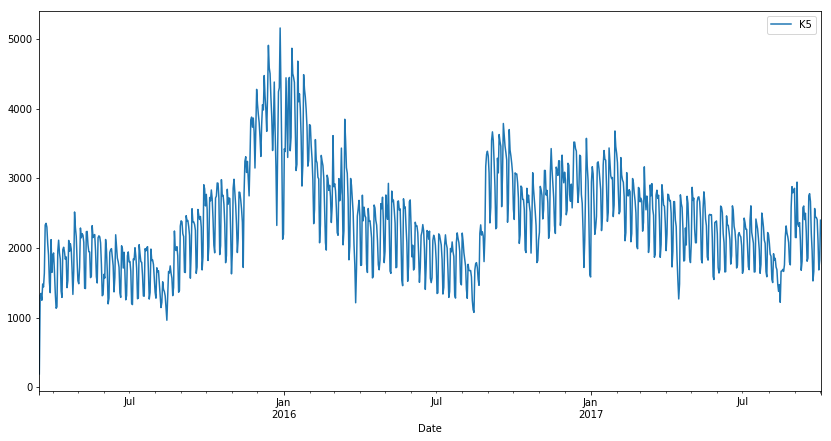

In [14]:
kvar = 'K5'
df_kpis.plot(x='Date', y=kvar, figsize=(14, 7))

From the chart it's difficult to distinguish a clear trend. There is huge spike in the period from Aug 2015 to Jan 2015, but we can't see the same trend for the next year. There seems to be a decreasing trend from Jan to Jul in all the years.

Let's make a stationary test

In [15]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_kpis[kvar].values)

/usr/lib64/python3.4/importlib/_bootstrap.py:321: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  return f(*args, **kwds)


(-2.9373226985142558,
 0.041176844302112284,
 21,
 910,
 {'1%': -3.4375564198635562,
  '10%': -2.5684639415529524,
  '5%': -2.8647213198889023},
 12517.095259855216)

In [16]:
df = df_kpis[['Date','K5']]
df.index = df['Date']
df.drop('Date', axis=1, inplace=True)

/usr/lib/python3.4/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The series *IS* stationary (p-value: 0.0412).
Let's decompose the series:

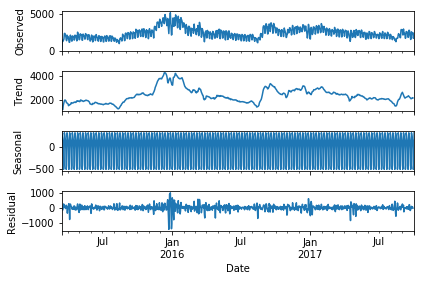

In [17]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df)
decomp.plot()
plt.show()

In [18]:
from statsmodels.graphics.tsaplots import acf, plot_acf
from statsmodels.graphics.tsaplots import pacf, plot_pacf

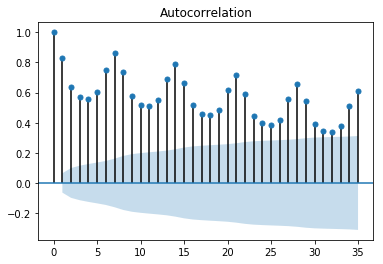

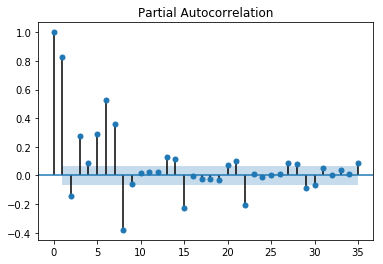

In [19]:
plot_acf(df_kpis[kvar].values, lags=35)
plot_pacf(df_kpis[kvar].values, lags=35)
plt.show()

There is a clear seasonality and looks like it's an autoregressive process. 
It's worth to try differentiate the data at weekly level.

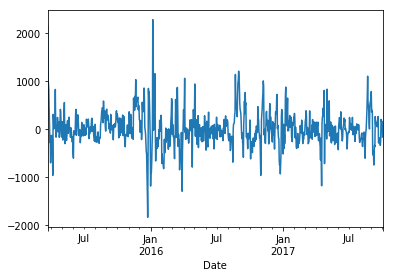

In [20]:
df_diff = df[kvar] - df[kvar].shift(7)
df_diff = df_diff[df_diff.notnull()]
df_diff.plot()

In [21]:
adfuller(df_diff)

(-6.5125525654914753,
 1.0912521595218037e-08,
 21,
 903,
 {'1%': -3.43761244359048,
  '10%': -2.5684770993820281,
  '5%': -2.8647460220589736},
 12421.777709419881)

Now the series is definitely stationary

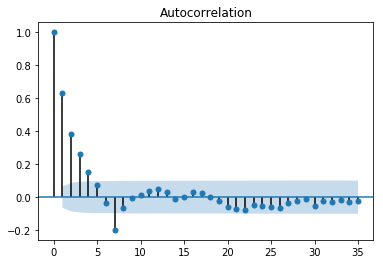

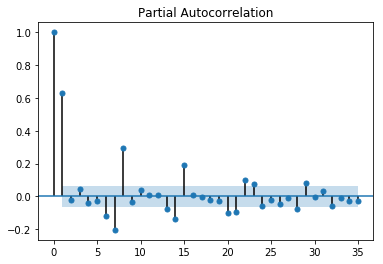

In [22]:
plot_acf(df_diff, lags=35)
plot_pacf(df_diff, lags=35)
plt.show()

In [23]:
print(acf(df_diff))

for i in range(2,5): print(acf(df_diff)[1]**i)

[ 1.          0.62993596  0.38363842  0.26064583  0.15409894  0.0730511
 -0.03751649 -0.19870636 -0.06397056 -0.00692033  0.01312328  0.03866718
  0.04890904  0.0293196  -0.00886087 -0.0014386   0.02896498  0.0240836
  0.00142228 -0.02570698 -0.06061494 -0.06989025 -0.08010512 -0.05013217
 -0.05116229 -0.05701016 -0.06718192 -0.03570706 -0.02449523 -0.0121634
 -0.0511615  -0.02522675 -0.02648292 -0.01858947 -0.02882513 -0.02033092
 -0.038479   -0.03810552 -0.0555665  -0.03860386 -0.01904167]
0.396819314848
0.249970756407
0.157465568637


Looks like *df_diff* is a model AR(1)

In [24]:
df_diff.shape

(925,)

const       15.459252
ar.L1.K5     0.654483
dtype: float64


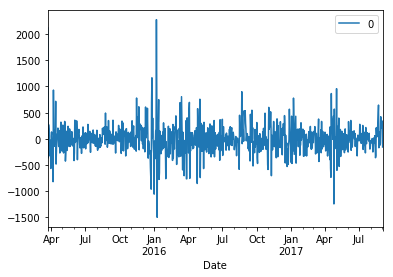

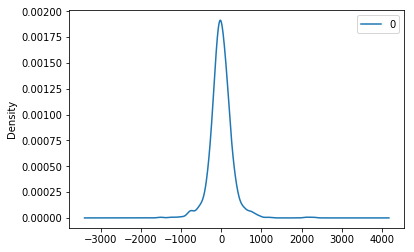

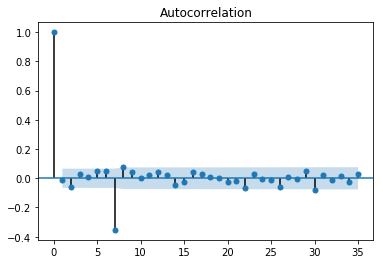

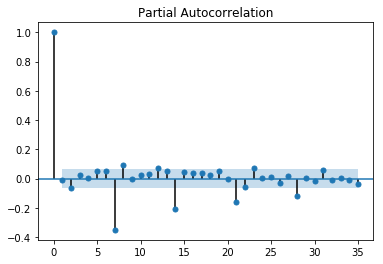

In [25]:
from statsmodels.tsa.arima_model import ARIMA
df_diff_ar1 = ARIMA(df_diff[:-30], order=(1,0,0))
ar1_fit = df_diff_ar1.fit()
print(ar1_fit.params)

# plot residual errors
residuals = pd.DataFrame(ar1_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
plot_acf(residuals, lags=35)
plot_pacf(residuals, lags=35)
plt.show()

In [26]:
print(ar1_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                     K5   No. Observations:                  895
Model:                     ARMA(1, 0)   Log Likelihood               -6301.639
Method:                       css-mle   S.D. of innovations            276.355
Date:                Tue, 05 Dec 2017   AIC                          12609.278
Time:                        08:34:55   BIC                          12623.668
Sample:                    03-23-2015   HQIC                         12614.777
                         - 09-02-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4593     26.686      0.579      0.563     -36.844      67.762
ar.L1.K5       0.6545      0.026     25.060      0.000       0.603       0.706
                                    Roots           

In [ ]:
# from statsmodels.stats.diagnostic import acorr_ljungbox
# ljungbox_test = acorr_ljungbox(residuals, lags=35)

Let's try a SARIMA as well, there seems to be a progressive degradation in the acf plot on the season pattern (weekly)

ar.L1          0.870605
ma.L1         -0.046754
ma.S.L7       -0.801450
sigma2     55639.976553
dtype: float64


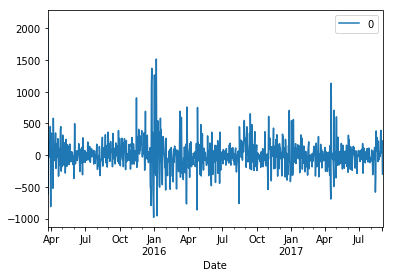

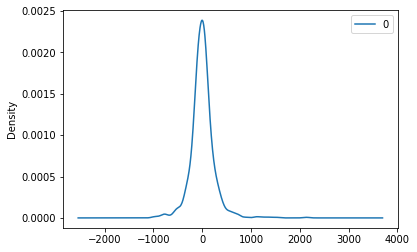

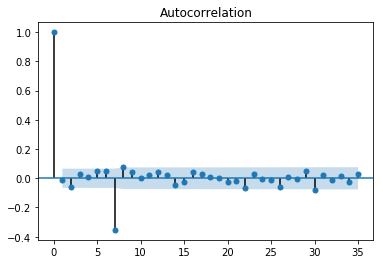

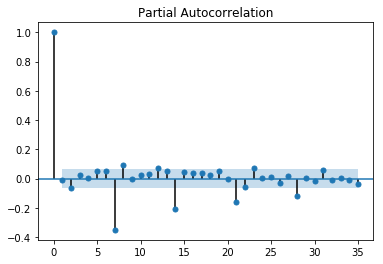

In [27]:
from statsmodels.tsa.statespace import sarimax
df_diff_sarma11 = sarimax.SARIMAX(df_diff[:-30], order=(1,0,1), seasonal_order=(0,0,1,7))

sarma11_fit = df_diff_sarma11.fit()
print(sarma11_fit.params)


# plot residual errors
residualss = pd.DataFrame(sarma11_fit.resid)
residualss.plot()
residualss.plot(kind='kde')
plot_acf(residuals, lags=35)
plot_pacf(residuals, lags=35)
plt.show()

In [28]:
print(sarma11_fit.summary())

                                 Statespace Model Results                                
Dep. Variable:                                K5   No. Observations:                  895
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 7)   Log Likelihood               -6163.534
Date:                           Tue, 05 Dec 2017   AIC                          12335.068
Time:                                   08:35:12   BIC                          12354.255
Sample:                               03-23-2015   HQIC                         12342.400
                                    - 09-02-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8706      0.016     55.674      0.000       0.840       0.901
ma.L1         -0.0468      0.025     -1.879

In [103]:
    type(df_diff[-30:])

pandas.core.series.Series

In [125]:
# sarma11_fit.predict(df_diff.reset_index()['K5'])
sarma11_fit.forecast(df_diff.reset_index()['K5'].iloc[-30:])

################################################################################
D
<class 'str'>
################################################################################


ValueError: no rule for interpreting end

## With exonegous variables

Let's calculate the correlation between the different metrics

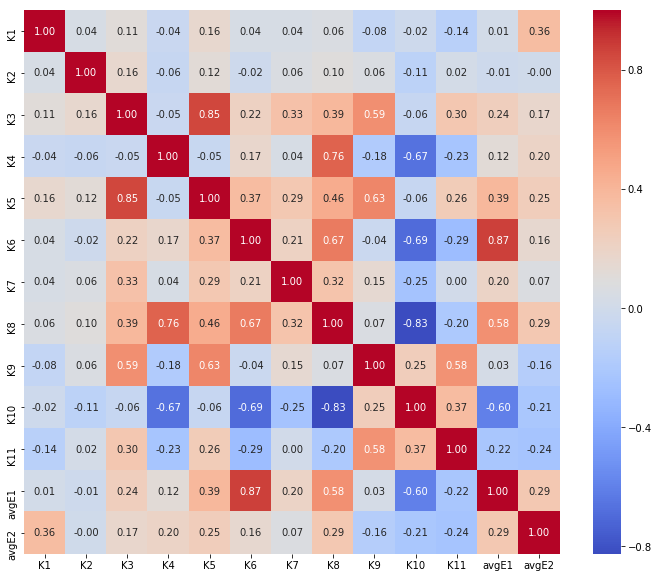

In [29]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,10))
g = sns.heatmap(df_kpis.drop(['Date', 'month', 'weekday'], axis=1).corr(), annot=True,
                fmt=".2f", cmap='coolwarm', ax=ax)

K3 and K9 seem to be the most correlated with K5

Let's see those series

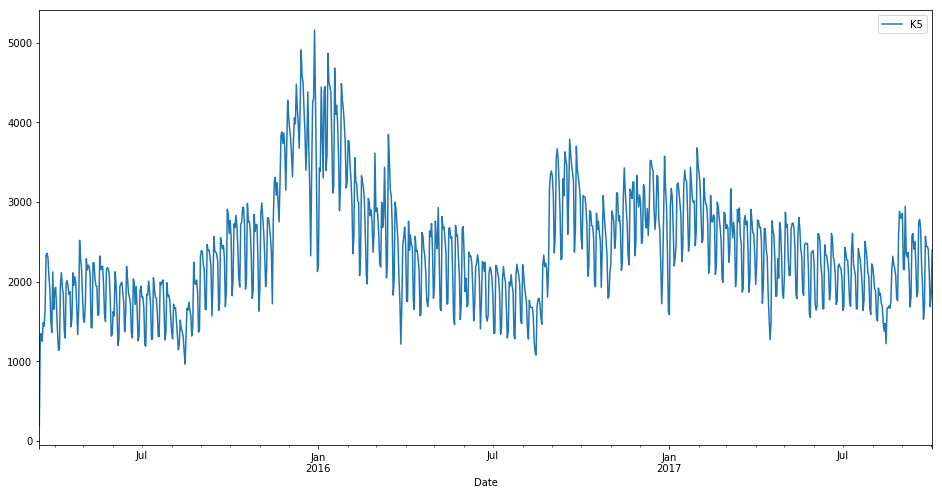

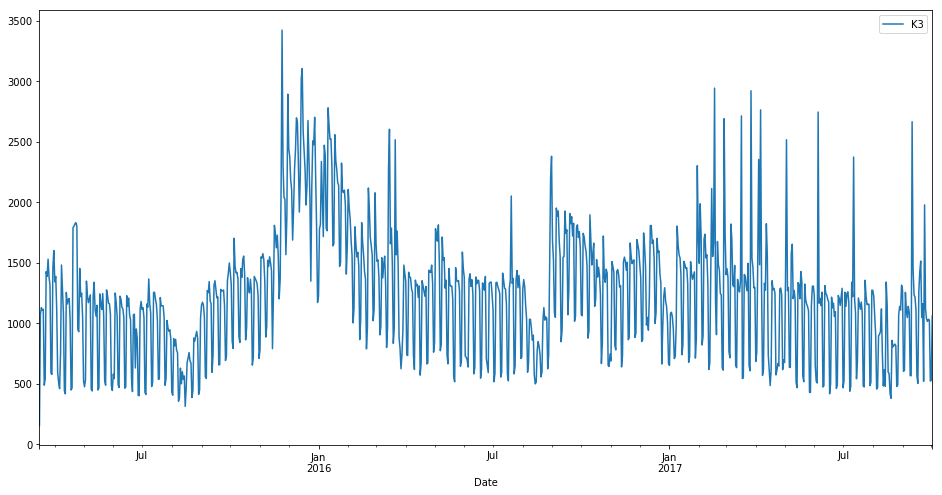

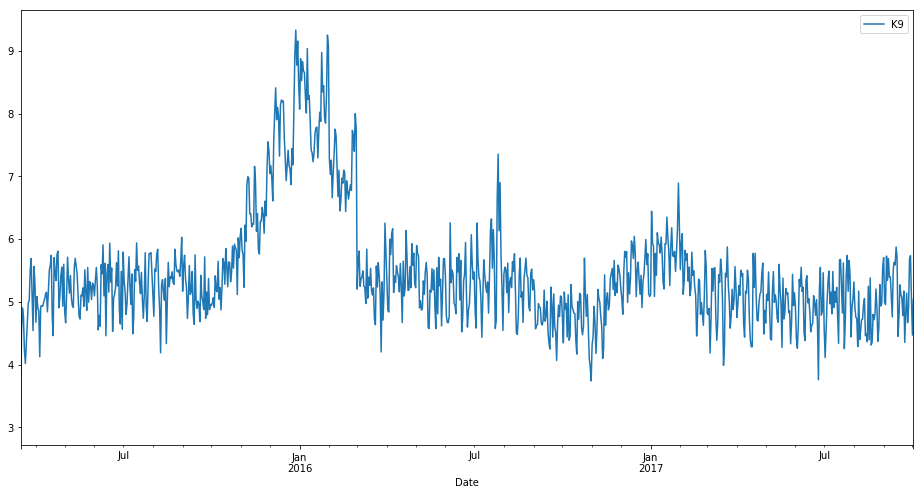

In [30]:
df_kpis.plot(x='Date', y='K5', figsize=(16, 8))
df_kpis.plot(x='Date', y='K3', figsize=(16, 8))
df_kpis.plot(x='Date', y='K9', figsize=(16, 8))

K3 and K9 show the same trend of K5, being particulary good on the period between Oct 2015 and Mar 2016

NOTE: is it worth to smooth the series?

In [128]:
df.head()

,K5
Date,
2015-03-16,194
2015-03-17,1320
2015-03-18,1349
2015-03-19,1251
2015-03-20,1484


In [31]:
# weekly differentiation
df = df_kpis[['Date','K5', 'K3', 'K6', 'K8', 'K9']]
df.index = df['Date']
df.drop('Date', axis=1, inplace=True)

def diff1(df, var, lag):
    df_diff = df[var] - df[var].shift(lag)
    return df_diff[df_diff.notnull()]

df_diffK5 = diff1(df, 'K5', 7)
df_diffK3 = diff1(df, 'K3', 7)
df_diffK6 = diff1(df, 'K6', 7)
df_diffK8 = diff1(df, 'K8', 7)
df_diffK9 = diff1(df, 'K9', 7)

/usr/lib/python3.4/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


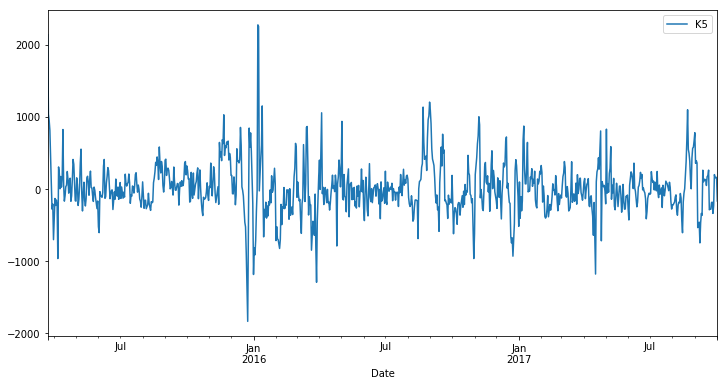

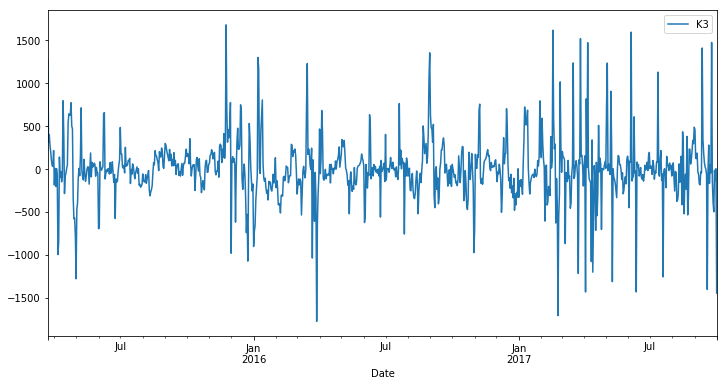

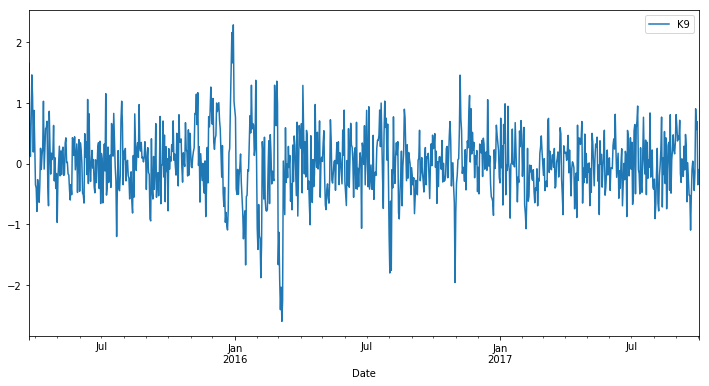

In [32]:
df_diff_var = pd.concat([df_diffK5, df_diffK3, df_diffK6, df_diffK8, df_diffK9], axis=1)

df_diff_var.plot(df_diff_var.index, 'K5', figsize=(12,6))
df_diff_var.plot(df_diff_var.index, 'K3', figsize=(12,6))
df_diff_var.plot(df_diff_var.index, 'K9', figsize=(12,6))

In [33]:
df_diff_var.corr()

,K5,K3,K6,K8,K9
K5,1.000000,0.527307,0.086056,0.330647,0.273898
K3,0.527307,1.000000,0.098973,0.305079,0.185830
K6,0.086056,0.098973,1.000000,0.319805,0.041990
K8,0.330647,0.305079,0.319805,1.000000,0.082535
K9,0.273898,0.185830,0.041990,0.082535,1.000000


In [36]:
train = df_diff_var[df_diff_var.index < '2017-09-01']
test = df_diff_var[df_diff_var.index >= '2017-09-01']

After the differencing, K9 seems to be less correlated with K5...

In [51]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2017-09-01 to 2017-10-02
Freq: D
Data columns (total 5 columns):
K5    32 non-null float64
K3    32 non-null float64
K6    32 non-null float64
K8    32 non-null float64
K9    32 non-null float64
dtypes: float64(5)
memory usage: 1.5 KB


0.368566197315


[]

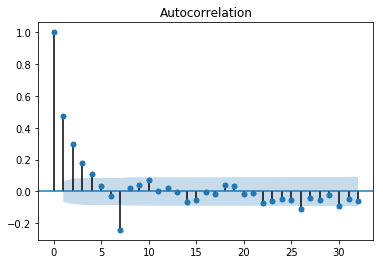

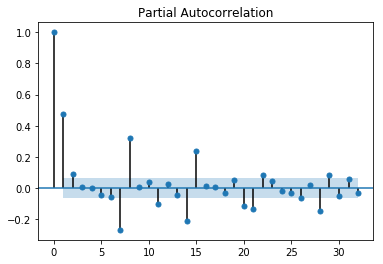

In [40]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
stdscaler.fit(train)

new_train = pd.DataFrame(stdscaler.transform(train), columns=train.columns, index=train.index)
new_test = pd.DataFrame(stdscaler.transform(test), columns=test.columns, index=test.index)

X_train = new_train.drop('K5', axis=1)
y_train = new_train['K5']

X_test = new_test.drop('K5', axis=1)
y_test = new_test['K5']

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.score(X_train, y_train))

y_pred = lm.predict(X_train)
residuals = y_train - y_pred

plot_acf(residuals, lags=32)
plot_pacf(residuals, lags=32)
plt.plot()

Residuals seem to follow the same pattern as the series, let's use a SARIMA

K3         0.285789
K6         0.195023
K8         0.246625
K9         0.099783
ar.L1      0.836902
ma.S.L7   -0.843394
sigma2     0.304337
dtype: float64


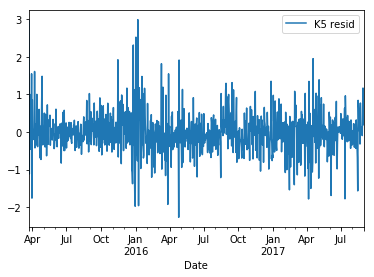

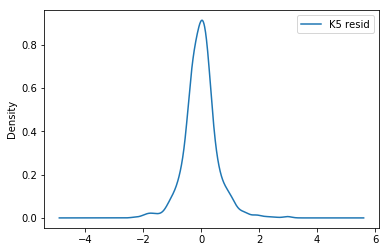

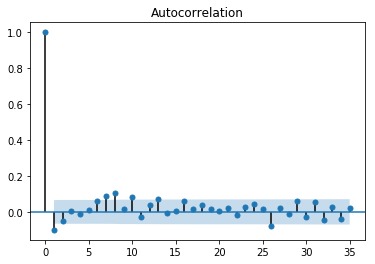

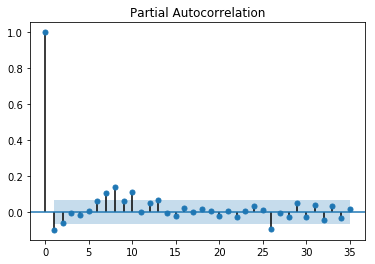

In [74]:
from statsmodels.tsa.statespace import sarimax
df_diff_var_sarma11 = sarimax.SARIMAX(y_train, order=(1,0,0), seasonal_order=(0,0,1,7), exog=X_train)

sarmavar11_fit = df_diff_var_sarma11.fit()
print(sarmavar11_fit.params)

# plot residual errors
residualss = pd.DataFrame(sarmavar11_fit.resid, columns=['K5 resid'])
residualss.plot()
residualss.plot(kind='kde')
plot_acf(residualss, lags=35)
plot_pacf(residualss, lags=35)
plt.show()

In [77]:
from scipy.stats import shapiro
shapiro(residualss)

(0.9476727843284607, 3.0111055127934915e-17)

In [42]:
sarmavar11_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                K5   No. Observations:                  893
Model:             SARIMAX(1, 0, 0)x(0, 0, 1, 7)   Log Likelihood                -740.627
Date:                           Tue, 05 Dec 2017   AIC                           1495.253
Time:                                   08:44:31   BIC                           1528.815
Sample:                               03-23-2015   HQIC                          1508.079
                                    - 08-31-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
K3             0.2858      0.016     18.370      0.000       0.255       0.316
K6             0.1950      0.032      6.050      0.000       0.132       0.258
K8             0.2466      0.031      7.920      0.000       0.186       0.308
K9             0.0998      0.022      4.558      0.000       0.057       0.143
ar.L1          0.8369      0.015     56.154      0.000       0.808       0.866
ma.S.L7       -0.8434      0.013    -63.244      0.000      -0.870      -0.817
sigma2         0.3043      0.010     31.894      0.000       0.286       0.323
===================================================================================
Ljung-Box (Q):                       85.13   Jarque-Bera (JB):               399.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.34
Prob(H) (two-sided):                  0.24   Kurtosis:                         6.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
f11 = sarmavar11_fit.forecast(X_test.shape[0], exog=X_test)

2017-09-01    1.342325
2017-09-02    1.122110
2017-09-03    1.037027
2017-09-04    0.247867
2017-09-05   -0.910808
2017-09-06   -0.870807
2017-09-07   -0.764637
2017-09-08   -0.381602
2017-09-09   -0.363828
2017-09-10   -0.265926
2017-09-11    1.350496
2017-09-12    0.674432
2017-09-13    0.372887
2017-09-14    0.477051
2017-09-15    0.334783
2017-09-16    0.126064
2017-09-17    0.081801
2017-09-18   -0.809447
2017-09-19    0.619456
2017-09-20    0.559096
2017-09-21   -0.493486
2017-09-22   -0.470917
2017-09-23   -0.345094
2017-09-24    1.447978
2017-09-25   -0.609128
2017-09-26   -1.178496
2017-09-27   -0.807398
2017-09-28    0.086184
2017-09-29    0.191597
2017-09-30    0.342543
2017-10-01   -1.242010
2017-10-02   -0.531097
Freq: D, dtype: float64

In [52]:
forecasts = pd.DataFrame(y_test)
forecasts['K5'] = f11

In [53]:
test.head()

,K5,K3,K6,K8,K9
Date,,,,,
2017-09-01,779.0,460.0,-1538.0,-191.0,0.808862
2017-09-02,355.0,125.0,-350.0,169.0,0.625730
2017-09-03,391.0,121.0,-226.0,304.0,0.374444
2017-09-04,360.0,185.0,-708.0,-167.0,0.453180
2017-09-05,-537.0,-35.0,-293.0,-833.0,0.408714


In [59]:
pred_test = pd.concat([forecasts, X_test], axis=1)
pred_test = pd.DataFrame(stdscaler.inverse_transform(pred_test), columns=test.columns, index=test.index)
pred_test.head()

,K5,K3,K6,K8,K9
Date,,,,,
2017-09-01,491.920614,460.0,-1538.0,-191.0,0.808862
2017-09-02,412.696461,125.0,-350.0,169.0,0.625730
2017-09-03,382.087081,121.0,-226.0,304.0,0.374444
2017-09-04,98.180902,185.0,-708.0,-167.0,0.453180
2017-09-05,-318.661037,-35.0,-293.0,-833.0,0.408714


In [72]:
y_pre = pd.DataFrame(train.loc[train.index >= '2017-08-15', 'K5'])
y_pre['K5 pred'] = np.NaN
y_pre

,K5,K5 pred
Date,,
2017-08-15,-608.0,NaN
2017-08-16,-185.0,NaN
2017-08-17,-59.0,NaN
2017-08-18,3.0,NaN
2017-08-19,179.0,NaN
2017-08-20,380.0,NaN
2017-08-21,685.0,NaN
2017-08-22,1097.0,NaN
2017-08-23,549.0,NaN


In [61]:
y_values = pd.concat([test['K5'], pred_test['K5']], axis=1)
y_values.columns = ['K5', 'K5 pred']

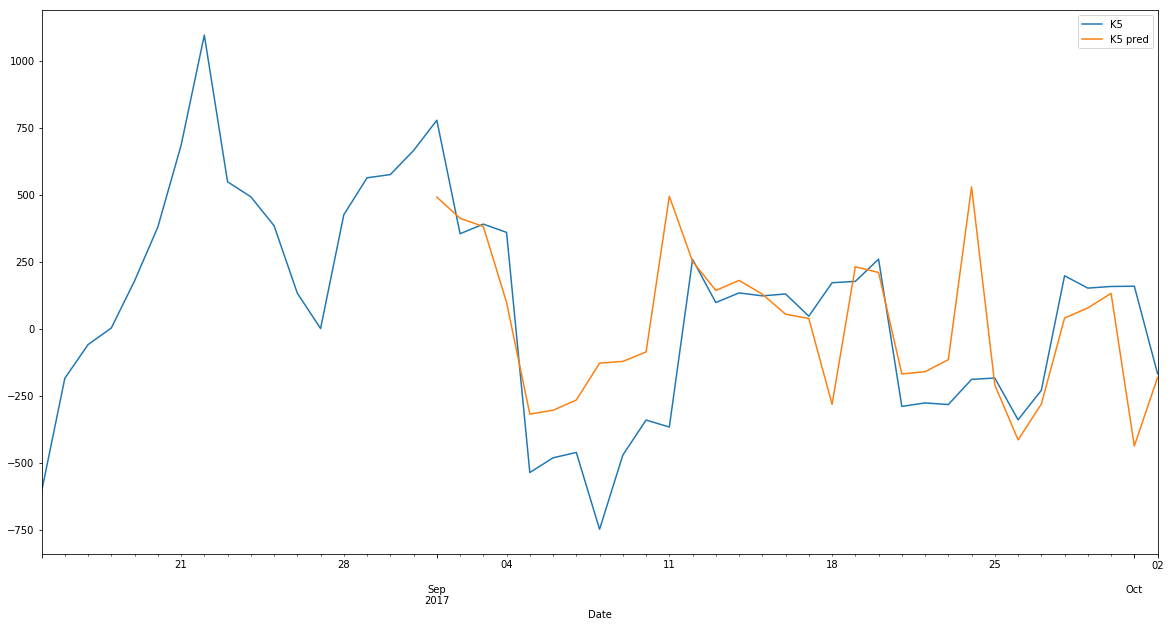

In [73]:
y_toplot = pd.concat([y_pre, y_values], axis=0)
y_toplot.plot(figsize=(20,10))

In [87]:
y_values['perc_error'] = abs(y_values['K5'] - y_values['K5 pred'])/abs(y_values['K5'])

y_values['perc_error'].mean()

0.72030452539817902

In [88]:
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred))
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return 200 * np.mean(diff)

smape(y_values['K5'], y_values['K5 pred'])

68.664568874894414